In [44]:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import glob as gb

In [3]:
test="Dataset/test"
train="Dataset/train"
valid="Dataset/val"
image_path="Dataset/train"

In [3]:
for folder in os.listdir(train):
    files = gb.glob(pathname=str(train + '/' + folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 4530 in folder fractured
For training data, found 4613 in folder not fractured


In [4]:
for folder in os.listdir(test):
    files = gb.glob(pathname=str(test + '/' + folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 199 in folder fractured
For training data, found 250 in folder not fractured


In [7]:
for folder in os.listdir(valid):
    files = gb.glob(pathname=str(valid + '/' + folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 265 in folder fractured
For training data, found 474 in folder not fractured


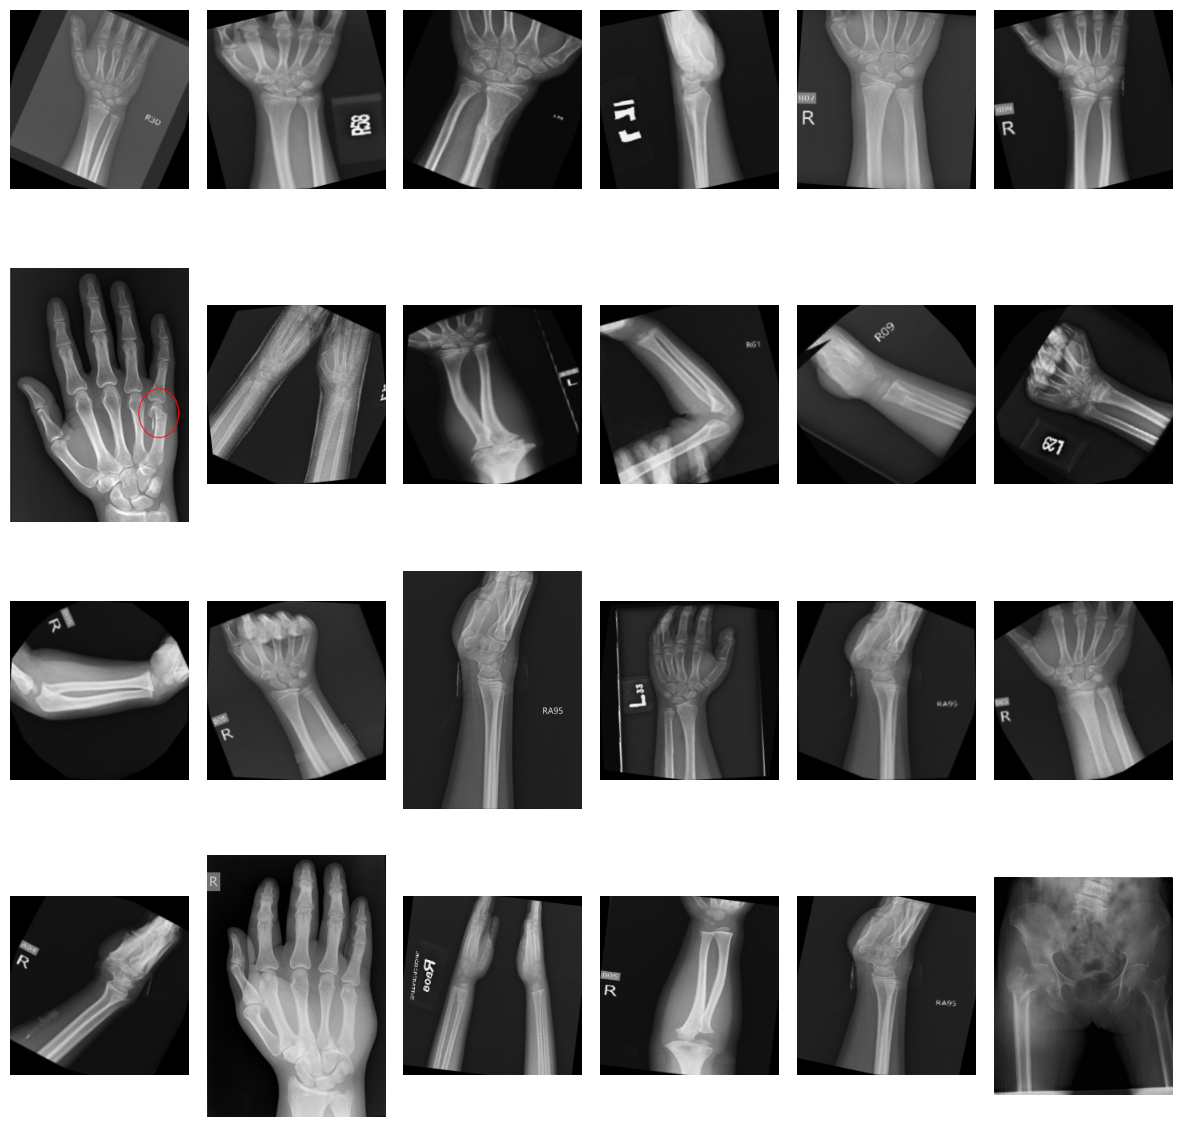

In [8]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(24):
    random_folder=np.random.randint(0,len(os.listdir(image_path)))
    random_folder_path=os.path.join(image_path,os.listdir(image_path)[random_folder])
    random_image=np.random.randint(0,len(os.listdir(random_folder_path)))
    random_image_path=os.path.join(random_folder_path,os.listdir(random_folder_path)[random_image])
    image=cv2.imread(random_image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.subplot(4,6,i+1)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [7]:
class_names = os.listdir(image_path)
print(class_names)

['fractured', 'not fractured']


In [6]:
code={'not fractured':0,'fractured':1}
def getcode(n):
    for x ,y in code.items():
        if n==y:
            return x


In [5]:
s=100


In [8]:
x_test = []
y_test = []
for folder in os.listdir(test):
    files = gb.glob(pathname=str(test + '/' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image, (s, s))
        x_test.append(list(image_array))
        y_test.append(code[folder])

In [13]:
print (len(x_test))

449


In [9]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [15]:
x_test.shape

(449, 100, 100, 3)

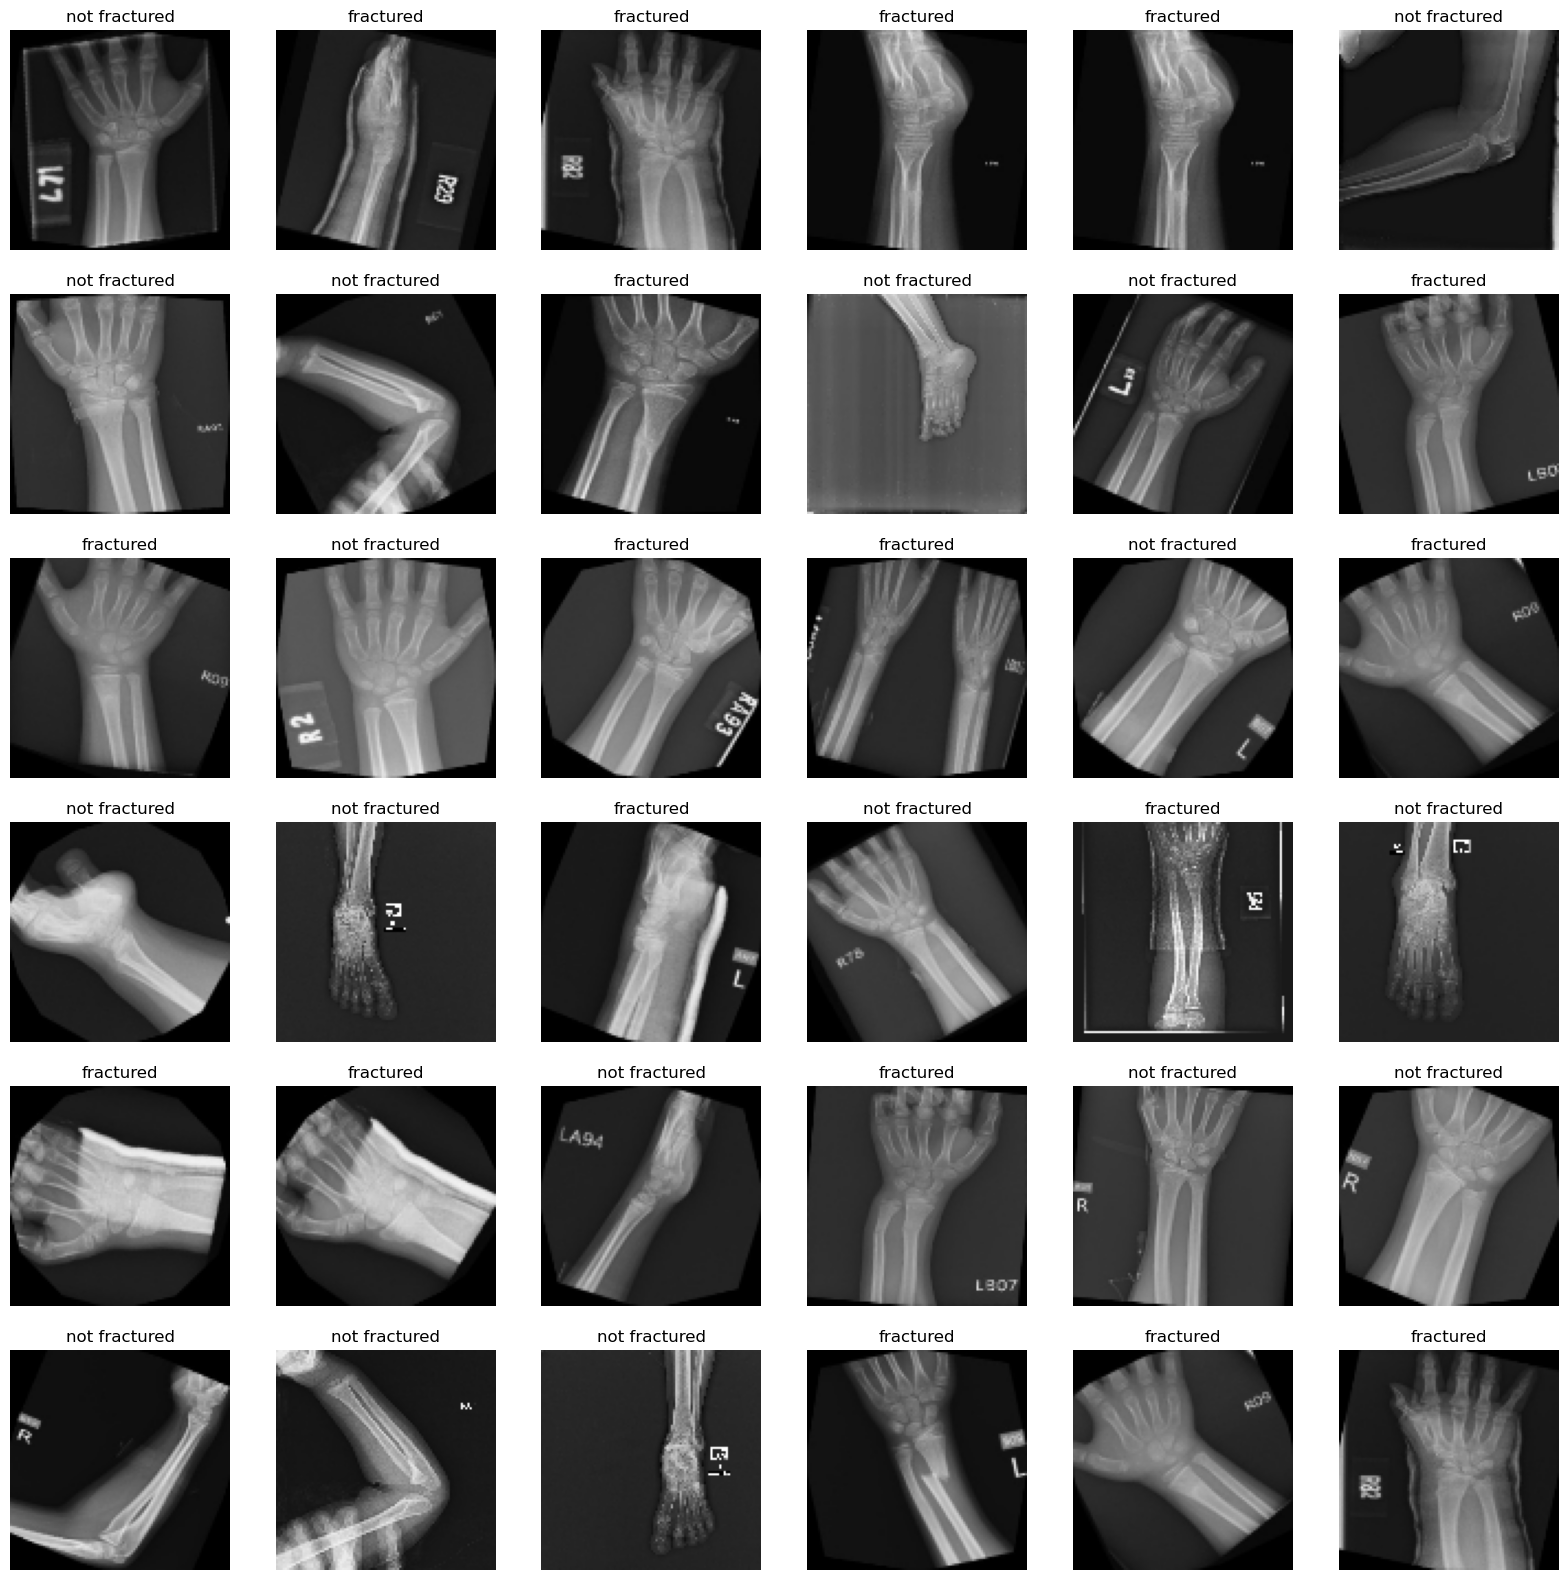

In [16]:
plt.figure(figsize=(20,20))
for n ,i in enumerate(list(np.random.randint(0,len(x_test),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [17]:
numberof_images={}
for class_name in class_names:
    numberof_images[class_name]=len(os.listdir(image_path+"/"+class_name))
print(numberof_images)
images_each_class=pd.DataFrame(numberof_images.values(),index=numberof_images.keys(),columns=["Number of images"])


{'fractured': 4606, 'not fractured': 4640}


In [18]:
images_each_class=pd.DataFrame(numberof_images.values(),index=numberof_images.keys(),columns=["Number of images"])
images_each_class

Number of images
fractured                  4606
not fractured              4640

In [19]:
print("Number of classes : {}".format(len(class_names)))

Number of classes : 2


In [28]:
x_train=[]
y_train=[]
for folder in os.listdir(train):
     files =gb.glob(pathname=str(train + '/' + folder + '/*.jpg'))
     for file in files:
         image = cv2.imread(file)
         if image is not None:
             image_array = cv2.resize(image, (s, s))
             x_train.append(list(image_array))
             y_train.append(code[folder])

In [33]:
print(len(x_train))

9140


In [34]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [35]:
import pickle
pickle_out=open("x_train.pickle","wb")
pickle.dump(x_train,pickle_out)
pickle_out.close()

In [36]:
pickle_out=open("y_train.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

In [11]:
import pickle

In [12]:
pickle_in=open("x_train.pickle","rb")
x_train=pickle.load(pickle_in)

pickle_in=open("y_train.pickle","rb")
y_train=pickle.load(pickle_in)

pickle_in.close()

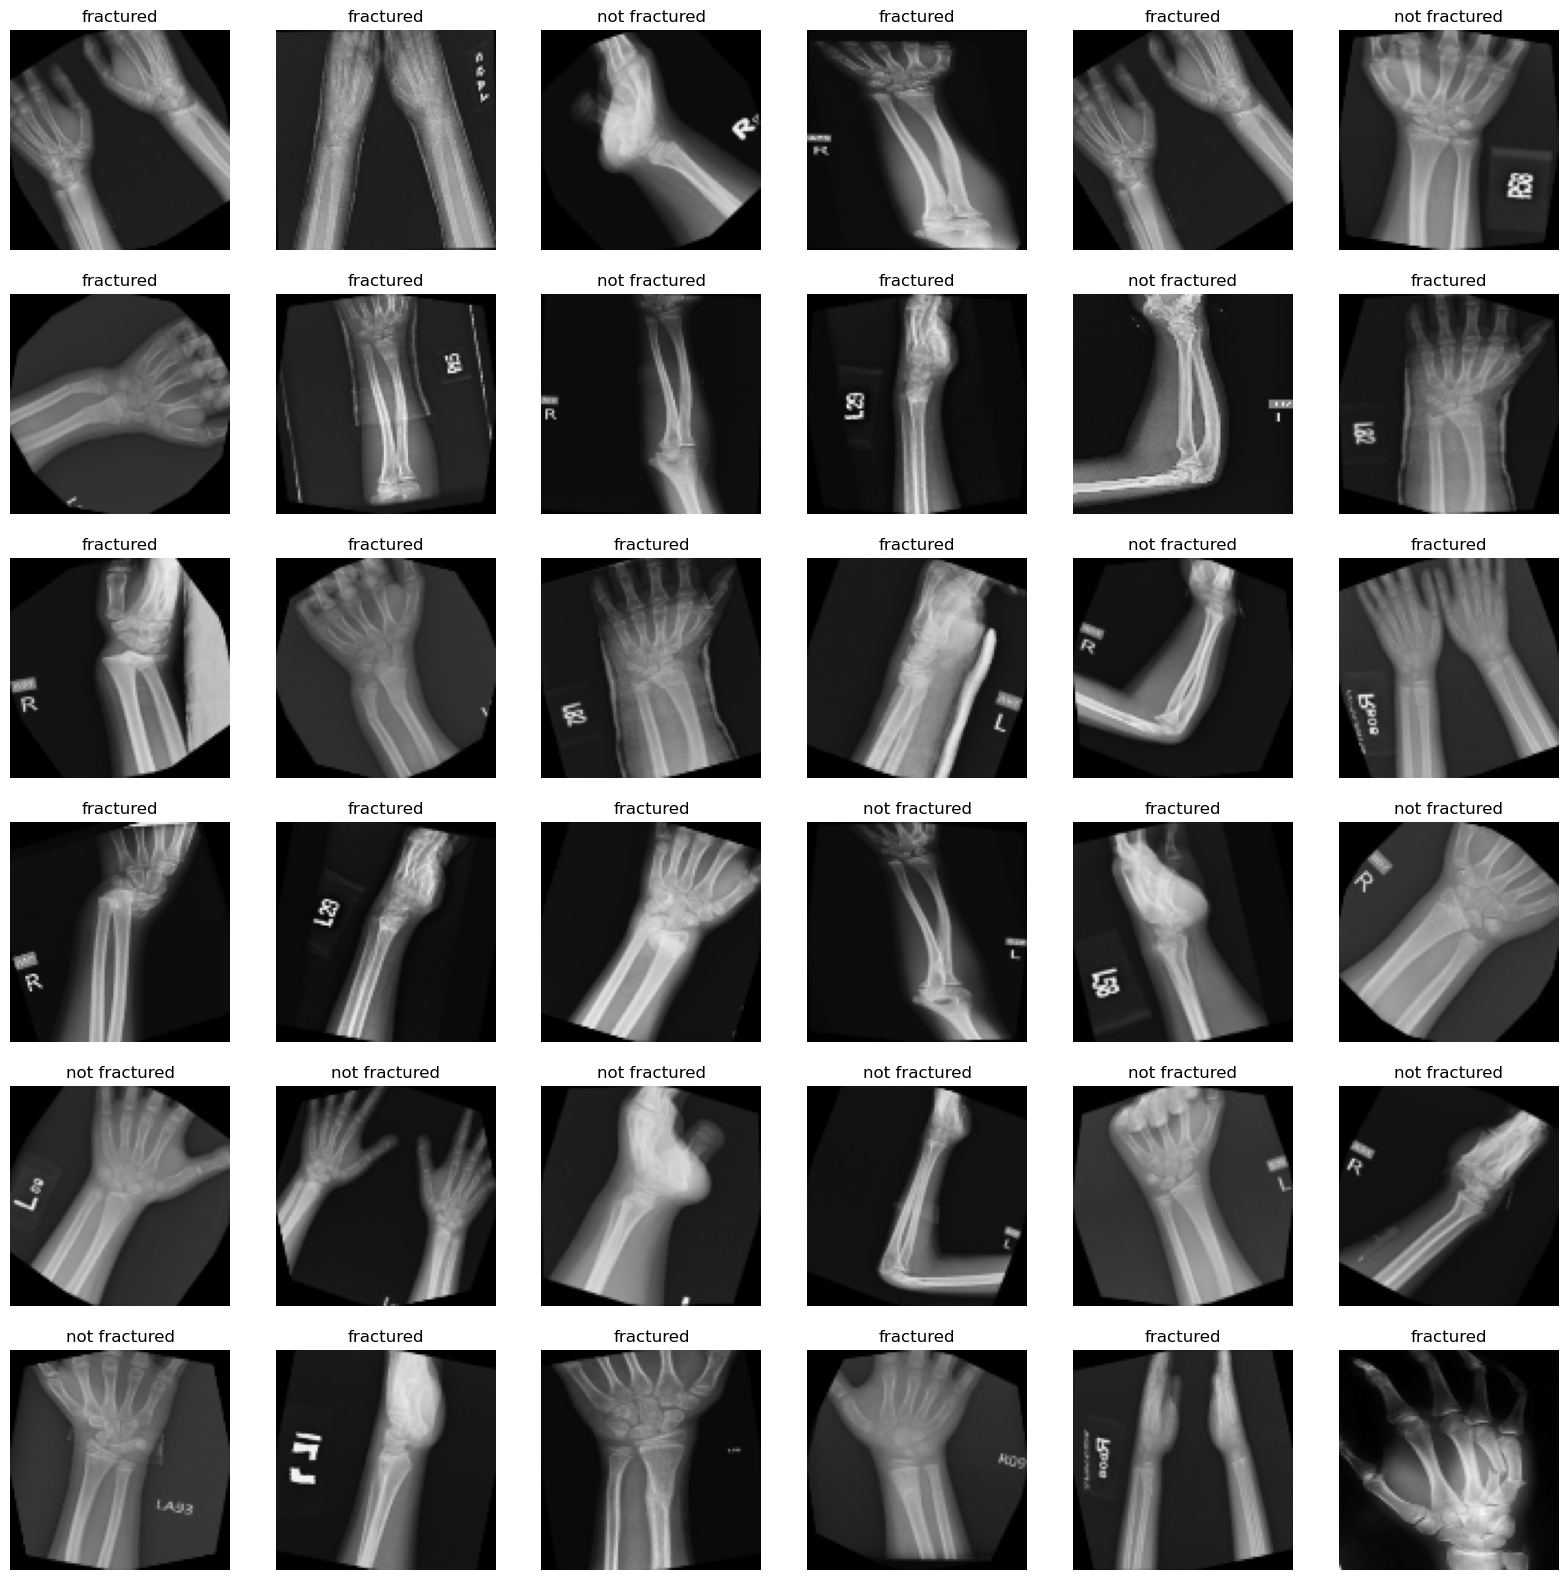

In [38]:
plt.figure(figsize=(20,20))
for n ,i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [39]:
print(len(x_train))

9140


In [51]:
x_pred = []
y_true_pred=[]
for folder in os.listdir(valid):
     files =gb.glob(pathname=str(valid + '/' + folder + '/*.jpg'))
     for file in files:
         image = cv2.imread(file)
         if image is not None:
             image_array = cv2.resize(image, (s, s))
             x_pred.append(list(image_array))
             y_true_pred.append(code[folder])

In [44]:
print(len(y_true_pred))

739


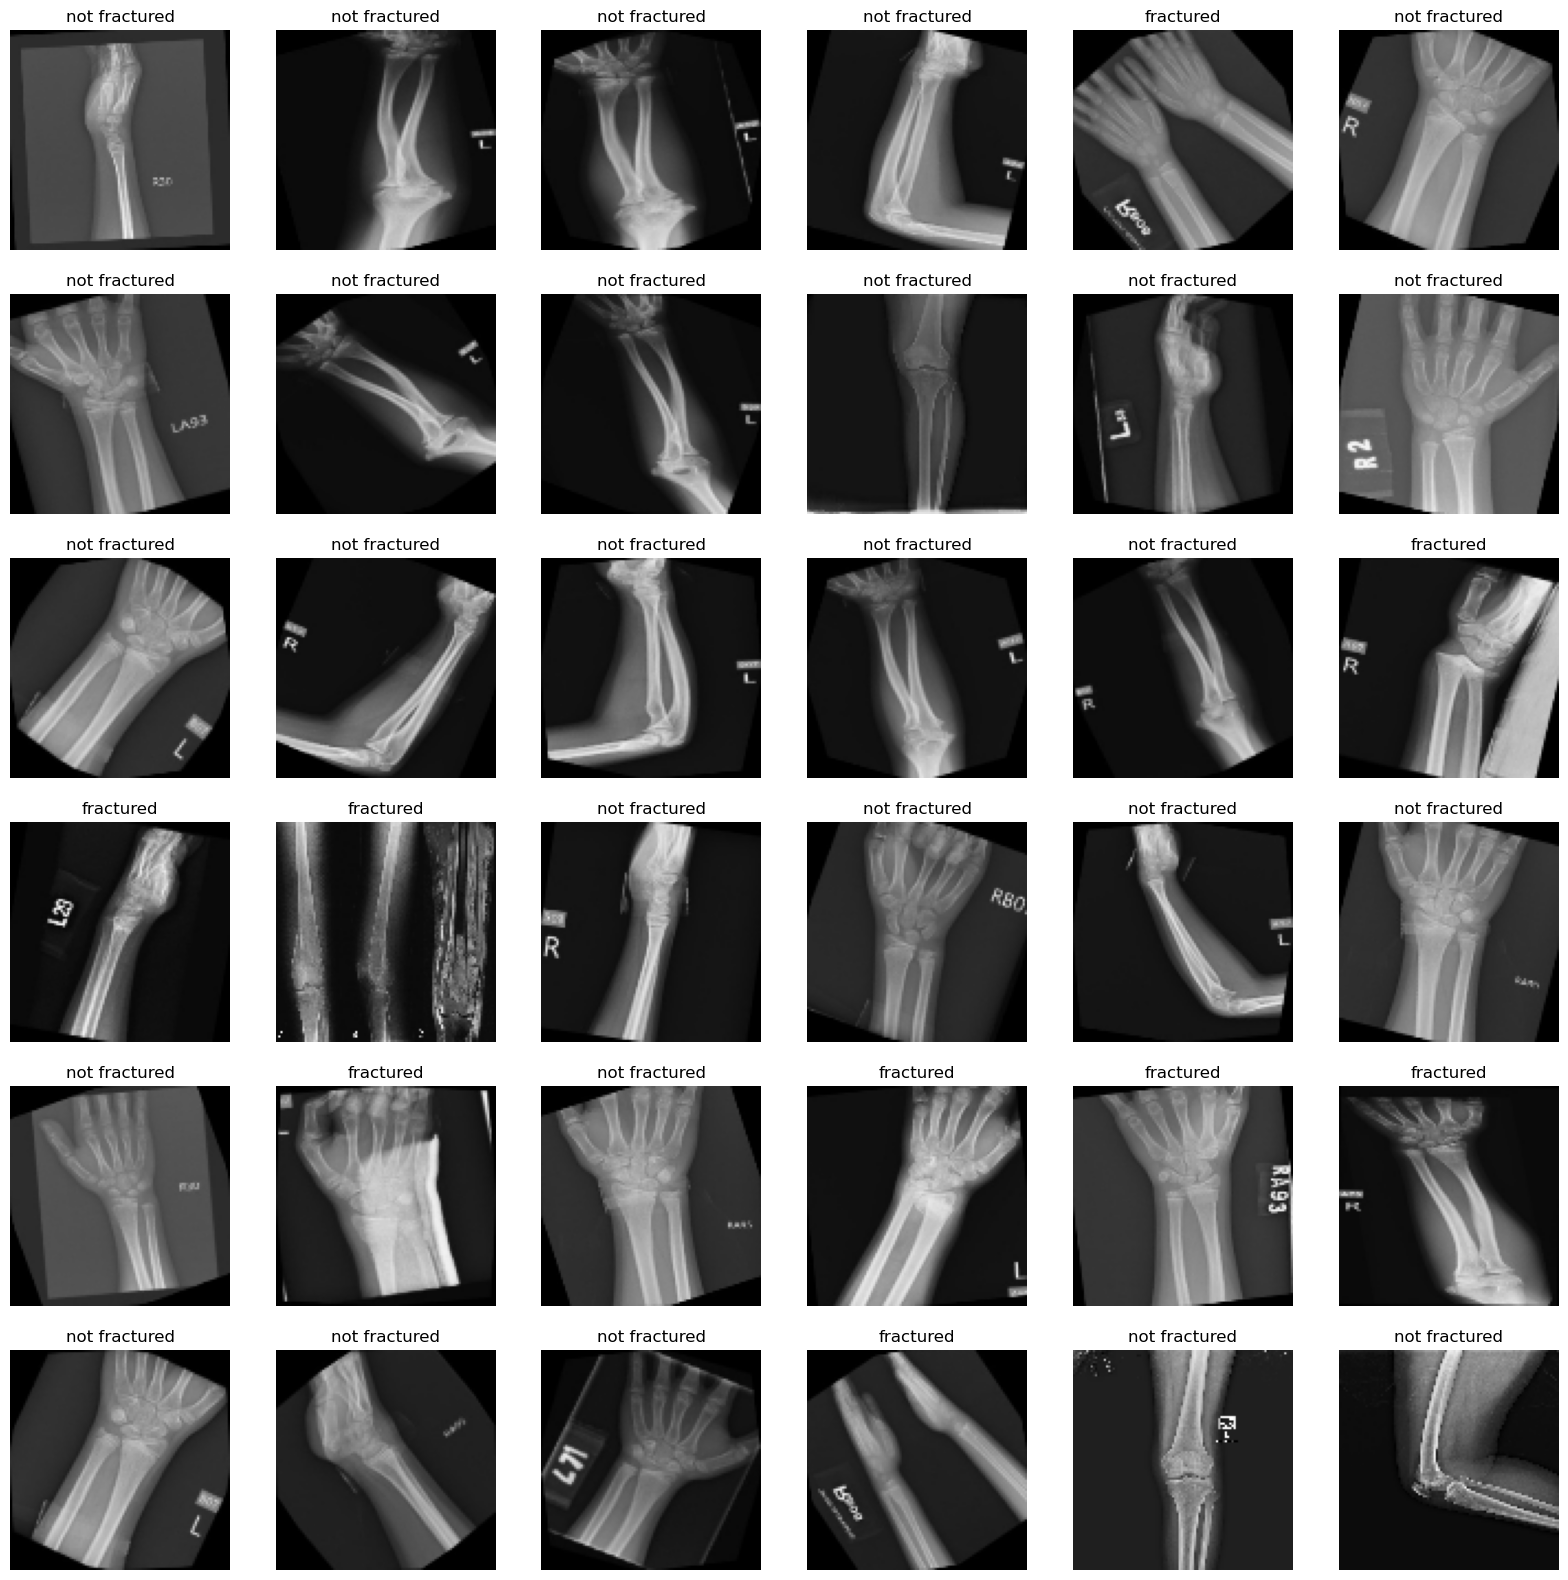

In [47]:
plt.figure(figsize=(20,20))
for n ,i in enumerate(list(np.random.randint(0,len(x_pred),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    plt.title(getcode(y_true_pred[i]))

In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(100, 100, 3)),  # Input layer with specified input shape
    tf.keras.layers.Conv2D(200, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(150, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(120, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(80, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(50, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [15]:
print("model_details is:")
print(model.summary())

model_details is:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 200)    │         5,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 150)    │       270,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 120)    │       162,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 44, 44, 80)     │        86,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 42, 42, 50)     │        36,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 22050)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,290,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,920,370 (45.47 MB)

 Trainable params: 11,920,370 (45.47 MB)

 Non-trainable params: 0 (0.00 B)

None


In [62]:
from tensorflow.keras.layers import Rescaling

In [116]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [117]:
print(x_train.shape)
print(y_train.shape)

(9140, 100, 100, 3)
(9140,)


In [118]:
rescale_layer = Rescaling(1./255)
x_train = rescale_layer(x_train)


KeyboardInterrupt: 

In [ ]:
print(x_train.shape)

In [ ]:
model.input_shape

In [16]:
training_process=model.fit(x_train, y_train,epochs=10)

Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 638s 2s/step - accuracy: 0.5614 - loss: 1.6344
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 753s 3s/step - accuracy: 0.7267 - loss: 0.5390
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 609s 2s/step - accuracy: 0.8985 - loss: 0.2305
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 666s 2s/step - accuracy: 0.9293 - loss: 0.1427
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 669s 2s/step - accuracy: 0.9854 - loss: 0.0501
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 602s 2s/step - accuracy: 0.9906 - loss: 0.0332
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 636s 2s/step - accuracy: 0.9918 - loss: 0.0331
Epoch 8/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 628s 2s/step - accuracy: 0.9981 - loss: 0.0085
Epoch 9/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 0.9874 - loss: 0.0420
Epoch 10/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 655s 2s/step - accuracy: 0.9965 - loss: 0.0141


In [24]:
model.save('Bone-fracture.h5')
model_loss,model_acc=model.evaluate(x_test,y_test)
print("model loss = {}".format(model_loss))
print("model accuracy = {}".format(model_acc))

15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 639ms/step - accuracy: 0.9887 - loss: 0.0404
model loss = 0.10729393362998962
model accuracy = 0.9688196182250977


In [50]:
from tensorflow.keras.models import load_model

model = load_model('Bone-fracture.h5')

Accuracy =  0.9938730597496033
Loss =  0.030419234186410904


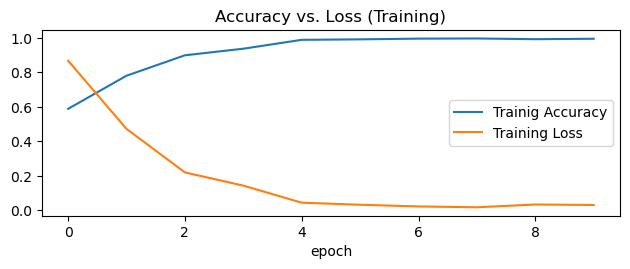

In [25]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(training_process.history['accuracy'])
plt.plot(training_process.history['loss'])
plt.title('Accuracy vs. Loss (Training)')
plt.xlabel('epoch')
plt.legend(['Trainig Accuracy', 'Training Loss'], loc = 'center right')
plt.tight_layout()
print("Accuracy = ",training_process.history['accuracy'][-1])
print("Loss = ",training_process.history['loss'][-1])

In [27]:
y_test_pred=model.predict(x_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 548ms/step


In [36]:
model.fit(x_test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9664 - loss: 0.0973
